<a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/model_monitoring/model_monitoring.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# **Cognifyz Internship Program**
## Restaurant Data Analysis - Level 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cognifyz_DA_Internship/Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## **Task 1: Top Cuisines**

### Determine the top three most common cuisines in Dataset.

In [ ]:
cuisines = df['Cuisines']

In [ ]:
top_cuisines = cuisines.value_counts()
top_cuisines

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"Bengali, Fast Food",1
"North Indian, Rajasthani, Asian",1
"Chinese, Thai, Malaysian, Indonesian",1


In [ ]:
top3_cuisines = top_cuisines.head(3)
print('Top Three Cuisines')
top3_cuisines

Top Three Cuisines


,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354


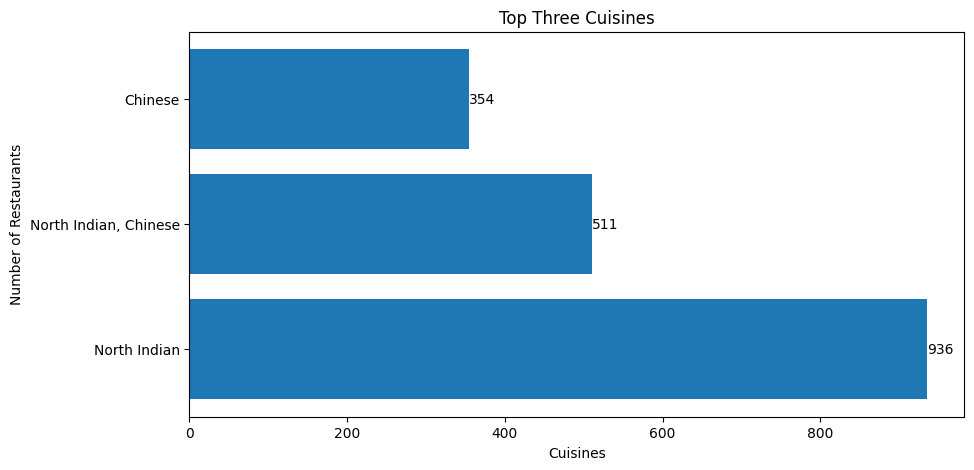

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(top3_cuisines.index, top3_cuisines.values)
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")
plt.title("Top Three Cuisines")

for index, value in enumerate(top3_cuisines.values):
    plt.text(value, index, str(value), va='center')

plt.show()

#### Calculate the percentage of restaurants that serve each of the top cuisines.

In [ ]:
cuisine_percentages = ((top3_cuisines / len(df)) * 100).round(2)

In [ ]:
cuisine_percentages = cuisine_percentages.to_frame().rename(columns={cuisine_percentages.name: 'Percentage'})

In [ ]:
print("Percentage of Restaurants Serving Top Three Cuisines")
cuisine_percentages

Percentage of Restaurants Serving Top Three Cuisines


,Percentage
Cuisines,
North Indian,9.80
"North Indian, Chinese",5.35
Chinese,3.71


## **Task 2: City Analysis**

#### Identify the city with the highest number of restaurants in the dataset

In [ ]:
city = df['City'].value_counts()

In [ ]:
city

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Panchkula,1
Mc Millan,1
Mayfield,1


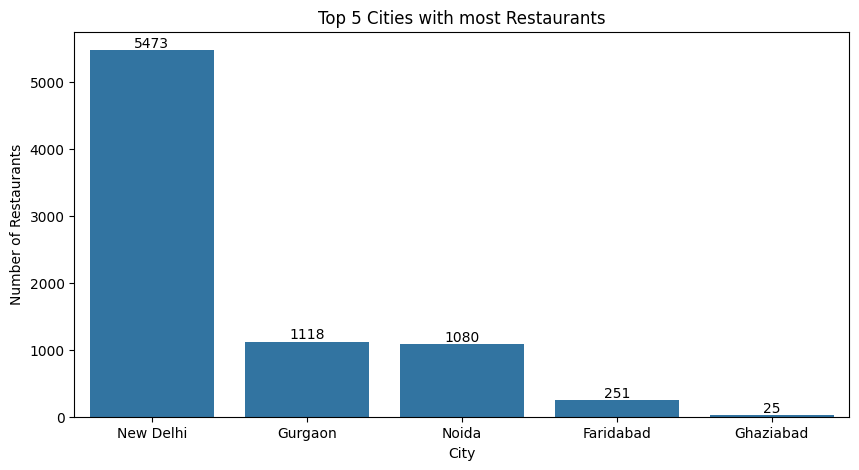

In [ ]:
top_5_cities = city.head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 5 Cities with most Restaurants')

for index, value in enumerate(top_5_cities.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

- The city with the highest number of restaurants is **New Delhi** with total **5473** Restaurants

#### Calculate the average rating for restaurants in each city.

In [ ]:
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().round(2)
avg_rating_by_city = avg_rating_by_city.rename('Avg Rating')
print("Average Rating for Restaurants in Each City:")
avg_rating_by_city

Average Rating for Restaurants in Each City:


,Avg Rating
City,
Abu Dhabi,4.30
Agra,3.96
Ahmedabad,4.16
Albany,3.56
Allahabad,3.40
...,...
Weirton,3.90
Wellington City,4.25
Winchester Bay,3.20


#### Determine the city with the highest average rating.

In [ ]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()

In [ ]:
highest_rated_city = city_avg_rating.sort_values(by='Aggregate rating',ascending=False).round(2)
highest_rated_city = highest_rated_city.rename(columns={'Aggregate rating': 'Avg Rating'})
highest_rated_city

,City,Avg Rating
56,Inner City,4.90
107,Quezon City,4.80
73,Makati City,4.65
95,Pasig City,4.63
75,Mandaluyong City,4.62
...,...,...
88,New Delhi,2.44
83,Montville,2.40
78,Mc Millan,2.40
89,Noida,2.04


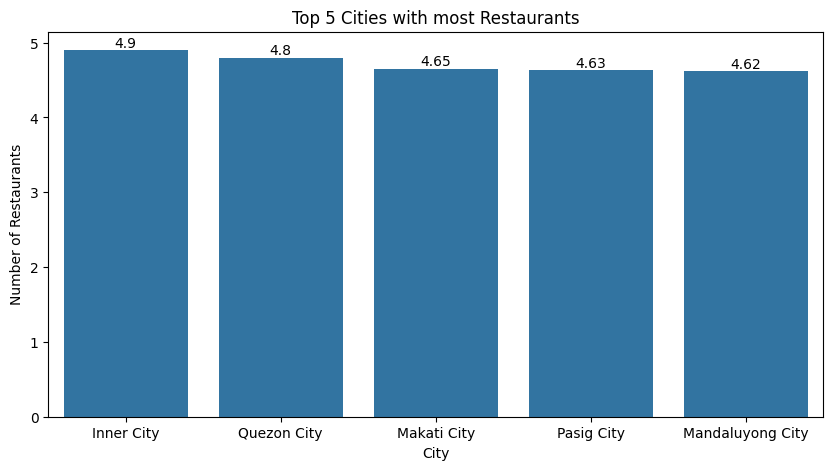

In [ ]:
plt.figure(figsize=(10,5))
top_5_cities = highest_rated_city.head(5)
sns.barplot(x=top_5_cities['City'], y=top_5_cities['Avg Rating'])
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 5 Cities with most Restaurants')

for index, value in enumerate(top_5_cities['Avg Rating']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

- The city with the highest average restaurant rating is **Inner City** with a rating of **4.9**.

## **Task 3: Price Range Distribution**

#### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants

In [ ]:
price_range = df['Price range'].value_counts()
price_range

,count
Price range,
1,4444
2,3113
3,1408
4,586


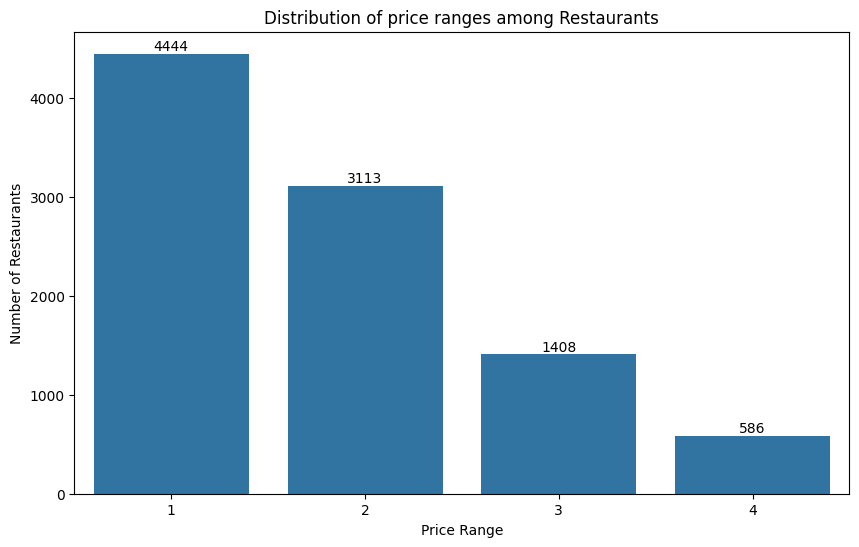

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Price range', data=df, order=df['Price range'].value_counts().index)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of price ranges among Restaurants')

for index, value in enumerate(price_range.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Calculate the percentage of restaurants in each price range category.

In [ ]:
price_range_percentages = ((df['Price range'].value_counts() / len(df)) * 100).round(2)
price_range_percentages = price_range_percentages.to_frame().rename(columns={price_range_percentages.name: 'Percentage'})
print("Percentage of Restaurants in Each Price Range Category")
price_range_percentages

Percentage of Restaurants in Each Price Range Category


,Percentage
Price range,
1,46.53
2,32.59
3,14.74
4,6.14


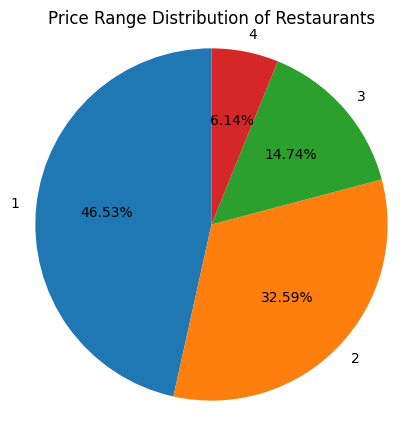

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(price_range_percentages['Percentage'], labels=price_range_percentages.index, autopct='%1.2f%%', startangle=90)
plt.title('Price Range Distribution of Restaurants')
plt.axis('equal')
plt.show()

- The distribution of price ranges shows a concentration of restaurants in the lower to mid-range categories.

## **Task 4: Online Delivery**

#### Determine the percentage of restaurants that offer online delivery.

In [ ]:
online_delivery = (df['Has Online delivery']=='Yes').sum()
online_delivery_percentage = online_delivery/len(df)*100

In [ ]:
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering online delivery: 25.66%


#### Compare the average ratings of restaurants with and without online delivery.

In [ ]:
average_rating_by_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean().round(2)
average_rating_by_delivery = average_rating_by_delivery.rename('Avg Rating')
average_rating_by_delivery

,Avg Rating
Has Online delivery,
No,2.47
Yes,3.25


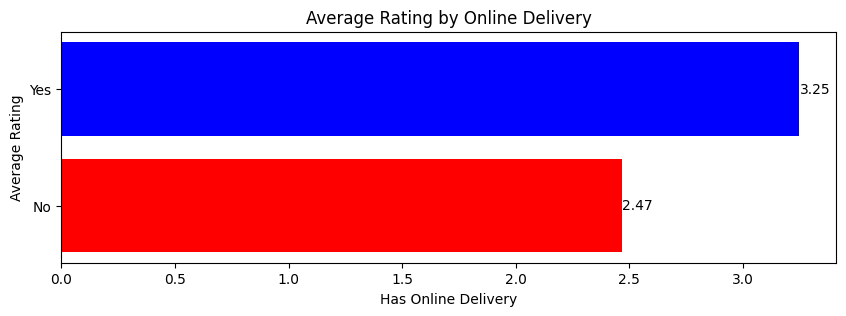

In [ ]:
plt.figure(figsize=(10, 3))
plt.barh(average_rating_by_delivery.index, average_rating_by_delivery.values, color=['red', 'blue'])
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Rating")
plt.title("Average Rating by Online Delivery")

for index, value in enumerate(average_rating_by_delivery.values):
    plt.text(value, index, str(value), va='center')

plt.show()

- A significant portion of restaurants offer online delivery, and those that do have a slightly higher average rating than those that don't.